### 9-30: Linear Regression
Isabella Turco  
QNC 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as st

In [32]:
age1 = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
age = age1.reshape(-1,1)
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

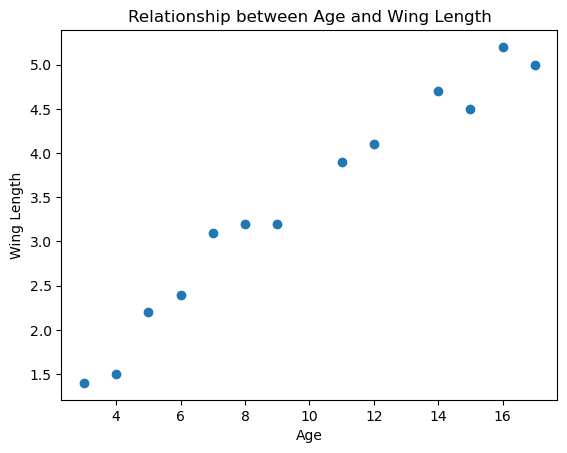

In [18]:
# Plot raw data 
plt.scatter(age, wing_length)
plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Relationship between Age and Wing Length")
plt.show()

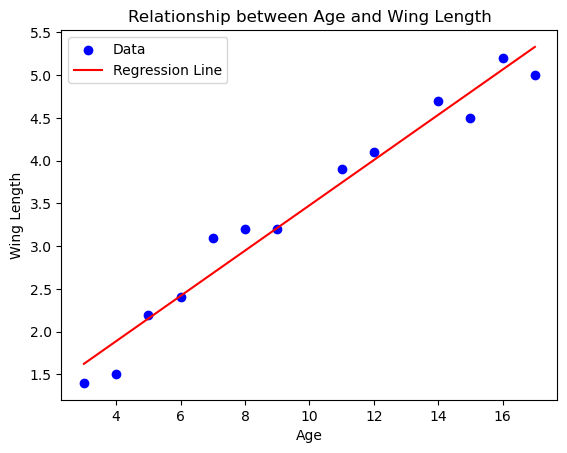

Coefficient = 0.2646841206602164
Intercept = 0.8296243597040398


In [28]:
linear_regression_model = LinearRegression()
linear_regression_results = linear_regression_model.fit(age, wing_length)
slope = linear_regression_model.coef_[0]
intercept = linear_regression_model.intercept_
predicted_wing_length = linear_regression_model.predict(age)

plt.scatter(age, wing_length, color = "blue", label = "Data")
plt.plot(age, predicted_wing_length, color = "red", label = "Regression Line")
plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Relationship between Age and Wing Length")
plt.legend()
plt.show()

print(f"Coefficient = {slope}")
print(f"Intercept = {intercept}")

Slope (Coefficient): 0.2646841206602164
Intercept: 0.8296243597040398
T-statistic for the slope: 17.70642561674497
P-value for the slope: 1.965891449628998e-09


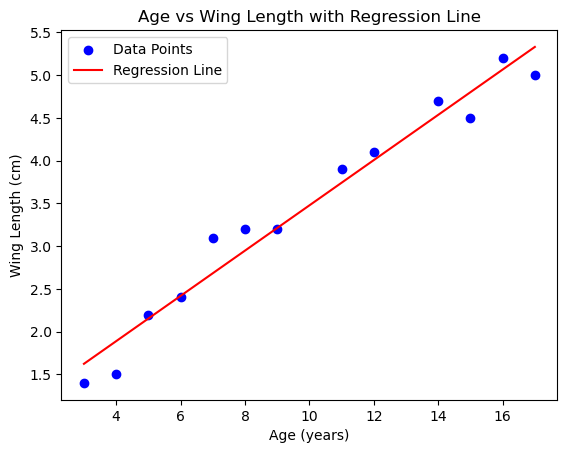

In [27]:
# Calcluate residuals
residuals = wing_length - predicted_wing_length
residual_sum_of_squares = np.sum(residuals**2)

# Calculate the variance of the residuals (Mean Squared Error)
residual_sum_of_squares = np.sum(residuals**2)
degrees_of_freedom = len(age) - 2  # N - 2 degrees of freedom
residual_variance = residual_sum_of_squares / degrees_of_freedom

# Calculate the variance of age
age_variance = np.var(age, ddof=1)  # Sample variance (ddof=1 for unbiased estimate)

# Calculate the standard error of the slope
slope_standard_error = np.sqrt(residual_variance / (len(age) * age_variance))

# Get the slope (coefficient) and intercept
slope = linear_regression_model.coef_[0]
intercept = linear_regression_model.intercept_

# Calculate the t-statistic for the slope
t_statistic = slope / slope_standard_error

# Calculate the p-value from the t-statistic
p_value = 2 * (1 - st.t.cdf(abs(t_statistic), df=degrees_of_freedom))

print(f"T-statistic for the slope: {t_statistic}")
print(f"P-value for the slope: {p_value}")



You can reject the null hypothesis that the slope is equal to zero, or qualitatively, that there's no relationship between age and wing length.

In [29]:
# Calculate the critical t-value for 95% confidence interval
alpha = 0.05  # 95% confidence level
t_critical = st.t.ppf(1 - alpha / 2, df=degrees_of_freedom)

# Calculate the confidence interval for the slope
lower_bound = slope - t_critical * slope_standard_error
upper_bound = slope + t_critical * slope_standard_error

print(f"Standard Error of the Slope: {slope_standard_error}")
print(f"95% Confidence Interval for the Slope: [{lower_bound}, {upper_bound}]")

Standard Error of the Slope: 0.014948478387975977
95% Confidence Interval for the Slope: [0.2317827415624606, 0.2975854997579722]


In [30]:
r_squared = linear_regression_model.score(age, wing_length)
print(f"Coefficient of Determination (R^2): {r_squared}")

Coefficient of Determination (R^2): 0.9633822518042856


In [33]:
# Calculate Pearson's correlation coefficient
pearson_r, p_value = st.pearsonr(age1, wing_length)

# Print Pearson's r and the corresponding p-value
print(f"Pearson's correlation coefficient (r): {pearson_r}")
print(f"P-value: {p_value}")

Pearson's correlation coefficient (r): 0.9815203776816283
P-value: 3.0097431724567374e-09


In [41]:
# Add some noise to the data 
age1_noise = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
age_noise = age1_noise.reshape(-1,1)
wing_length_noise = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 8.0, 3.9, 4.1, 1.0, 4.7, 4.5, 5.2, 5.0, 2.0])

16
16


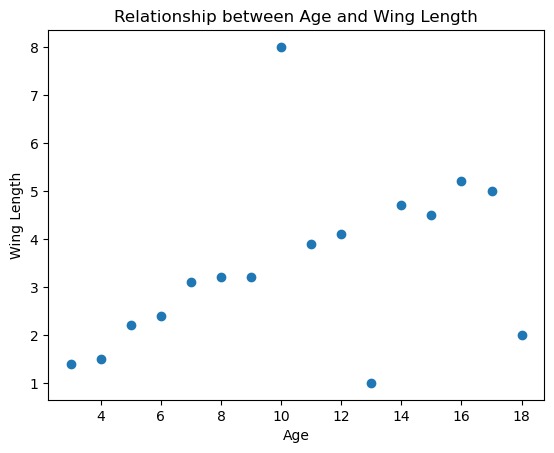

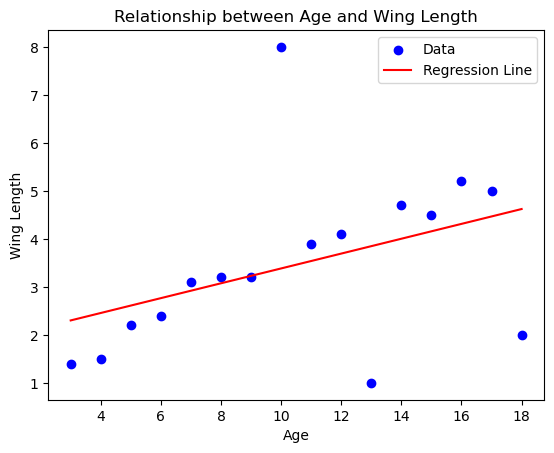

Coefficient = 0.1547058823529412
Intercept = 1.838088235294118
T-statistic for the slope: 1.7356289147439987
P-value for the slope: 0.10457605341951814
Standard Error of the Slope: 0.0891353451413086
95% Confidence Interval for the Slope: [-0.03647041932901823, 0.3458821840349006]
Coefficient of Determination (R^2): 0.16786198569985478
Pearson's correlation coefficient (r): 0.4097096358396454
P-value: 0.11502277138153105


In [44]:
plt.scatter(age_noise, wing_length_noise)
plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Relationship between Age and Wing Length")
plt.show()

linear_regression_model = LinearRegression()
linear_regression_results_n = linear_regression_model.fit(age_noise, wing_length_noise)
slope_n = linear_regression_model.coef_[0]
intercept_n = linear_regression_model.intercept_
predicted_wing_length_noise = linear_regression_model.predict(age_noise)

plt.scatter(age_noise, wing_length_noise, color = "blue", label = "Data")
plt.plot(age_noise, predicted_wing_length_noise, color = "red", label = "Regression Line")
plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Relationship between Age and Wing Length")
plt.legend()
plt.show()

print(f"Coefficient = {slope}")
print(f"Intercept = {intercept}")

# Calcluate residuals
residuals_n = wing_length_noise - predicted_wing_length_noise
residual_sum_of_squares_n = np.sum(residuals_n**2)

# Calculate the variance of the residuals (Mean Squared Error)
residual_sum_of_squares_n = np.sum(residuals_n**2)
degrees_of_freedom_n = len(age_noise) - 2  # N - 2 degrees of freedom
residual_variance_n = residual_sum_of_squares_n / degrees_of_freedom_n

# Calculate the variance of age
age_variance_n = np.var(age_noise, ddof=1)  # Sample variance (ddof=1 for unbiased estimate)

# Calculate the standard error of the slope
slope_standard_error_n = np.sqrt(residual_variance_n / (len(age_noise) * age_variance_n))

# Get the slope (coefficient) and intercept
slope_n = linear_regression_model.coef_[0]
intercept_n = linear_regression_model.intercept_

# Calculate the t-statistic for the slope
t_statistic_n = slope_n / slope_standard_error_n

# Calculate the p-value from the t-statistic
p_value_n = 2 * (1 - st.t.cdf(abs(t_statistic_n), df=degrees_of_freedom_n))

print(f"T-statistic for the slope: {t_statistic_n}")
print(f"P-value for the slope: {p_value_n}")

# Calculate the critical t-value for 95% confidence interval
t_critical_n = st.t.ppf(1 - alpha / 2, df=degrees_of_freedom_n)

# Calculate the confidence interval for the slope
lower_bound_n = slope_n - t_critical_n * slope_standard_error_n
upper_bound_n = slope_n + t_critical_n * slope_standard_error_n

print(f"Standard Error of the Slope: {slope_standard_error_n}")
print(f"95% Confidence Interval for the Slope: [{lower_bound_n}, {upper_bound_n}]")

r_squared_n = linear_regression_model.score(age_noise, wing_length_noise)
print(f"Coefficient of Determination (R^2): {r_squared_n}")

# Calculate Pearson's correlation coefficient
pearson_r_n, p_value_n = st.pearsonr(age1_noise, wing_length_noise)

# Print Pearson's r and the corresponding p-value
print(f"Pearson's correlation coefficient (r): {pearson_r_n}")
print(f"P-value: {p_value_n}")
